In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

In [4]:
df_DA_US['salary_year_avg'].sample(10)

321931     60000.0
290386     60000.0
194344    112500.0
132511     36000.0
441762    110000.0
72868      90000.0
129719     82500.0
410       133285.0
539548     72500.0
495143    112690.0
Name: salary_year_avg, dtype: float64

<Axes: >

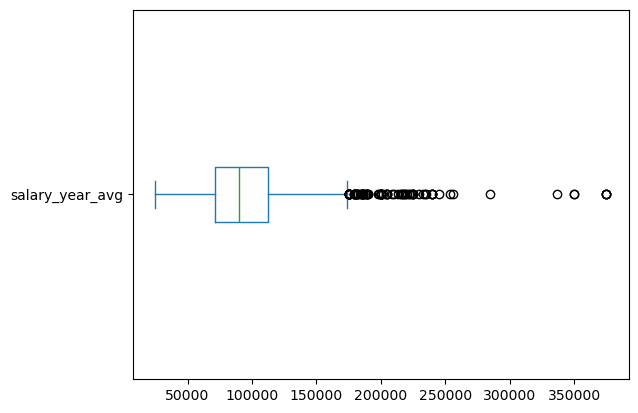

In [9]:
df_DA_US['salary_year_avg'].plot(kind='box', vert=False)

{'whiskers': [<matplotlib.lines.Line2D at 0x2626eb665d0>,
 'caps': [<matplotlib.lines.Line2D at 0x2626eb66ae0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2626eb66390>],
 'medians': [<matplotlib.lines.Line2D at 0x2626eb67020>],
 'fliers': [<matplotlib.lines.Line2D at 0x2626eb67260>],
 'means': []}

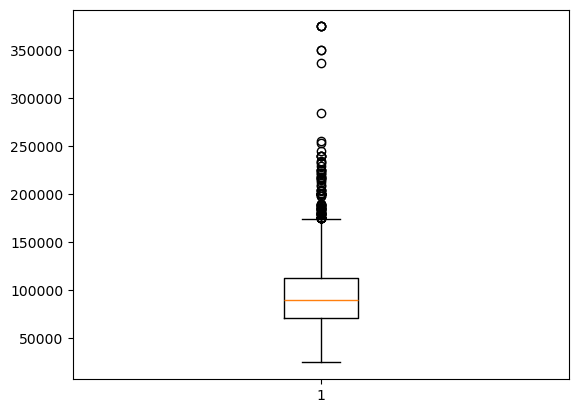

In [8]:
plt.boxplot(df_DA_US['salary_year_avg'])

C:\Users\Neil\AppData\Local\Temp\ipykernel_15604\3061071002.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels=job_titles, vert=False)


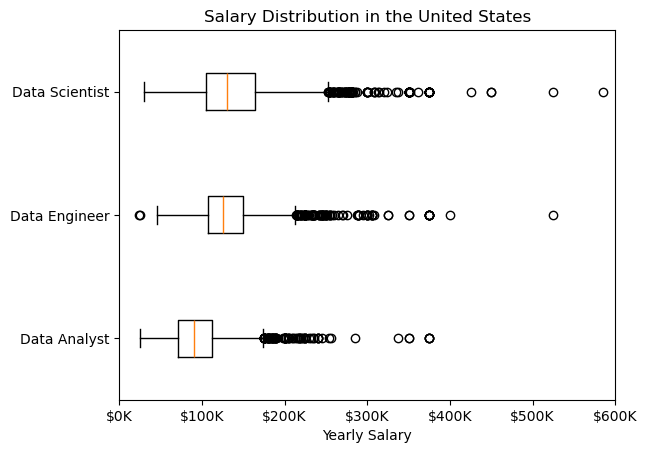

In [22]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

# Filter the data to get the appropriate job titles
df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].copy()
df_US = df_US.dropna(subset=['salary_year_avg'])

job_list = [df_US[df_US['job_title_short']== job_title]['salary_year_avg'] for job_title in job_titles]

plt.boxplot(job_list, labels=job_titles, vert=False)
plt.title('Salary Distribution in the United States')
plt.xlabel('Yearly Salary')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.xlim(0, 600000)
plt.show()

In [18]:
job_list[0]

109        89000.0
180        90250.0
410       133285.0
988        62623.0
1413       71300.0
            ...   
782637     70000.0
782798    111175.0
783588    125000.0
783866    115000.0
784882     87500.0
Name: salary_year_avg, Length: 4350, dtype: float64